In [33]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
data.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [10]:
data.head()
data.tail()
data.columns
data.shape
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [11]:
data.target.value_counts()


target
0    179902
1     20098
Name: count, dtype: int64

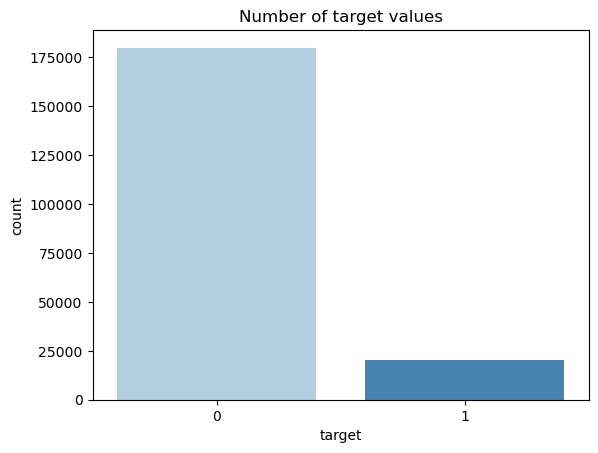

In [14]:
sns.countplot(data=data, x='target', palette="Blues")
plt.title('Number of target values')
plt.show()


In [15]:
data.isnull().sum()


ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [17]:

# Initialize the scaler
scaler = RobustScaler()

# Separate the features and target
features = data.drop(columns=['ID_code', 'target'])
target = data['target']

# Scale the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Add the 'ID_code' and 'target' columns back to the DataFrame
scaled_data['ID_code'] = data['ID_code']
scaled_data['target'] = target

# Update the original DataFrame
data = scaled_data


In [18]:
data.drop(columns=['ID_code'], inplace=True)


In [20]:
data.duplicated().sum()

0

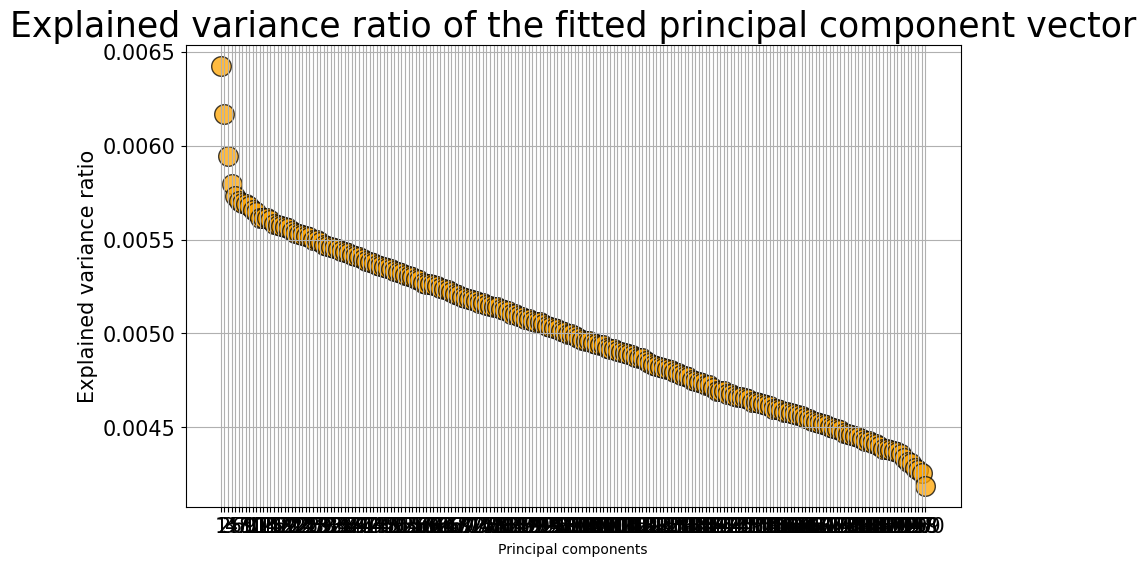

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns=['target']))

plt.figure(figsize=(10, 6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_, s=200, alpha=0.75, c='orange', edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the fitted principal component vector", fontsize=25)
plt.xlabel("Principal components", fontsize=10)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=15)
plt.show()



In [22]:
pca = PCA(n_components=175)
principal_components = pca.fit_transform(data.drop(columns=['target']))
principal_df = pd.DataFrame(data=principal_components, columns=[f'pca{i+1}' for i in range(175)])


In [23]:
X = principal_df
y = data['target']


In [24]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, test_size=0.30)


Training Accuracy: 79.77%
Testing Accuracy: 79.69%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80    125904
           1       0.79      0.81      0.80    125958

    accuracy                           0.80    251862
   macro avg       0.80      0.80      0.80    251862
weighted avg       0.80      0.80      0.80    251862

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     53998
           1       0.79      0.81      0.80     53944

    accuracy                           0.80    107942
   macro avg       0.80      0.80      0.80    107942
weighted avg       0.80      0.80      0.80    107942



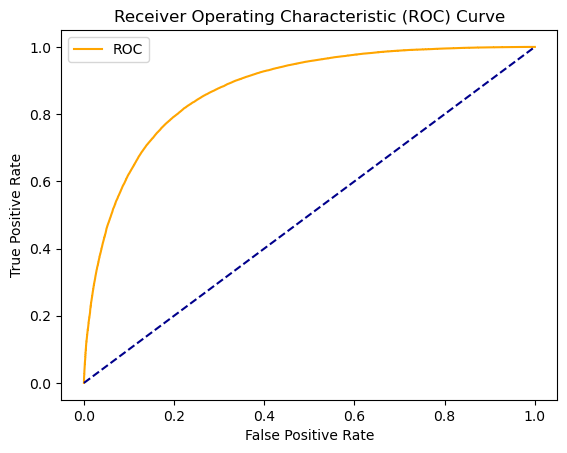

AUC: 0.88


In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_train_pred = log_reg.predict(X_train)
log_test_pred = log_reg.predict(X_test)

log_train_accuracy = accuracy_score(y_train, log_train_pred)
log_test_accuracy = accuracy_score(y_test, log_test_pred)

print(f"Training Accuracy: {log_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {log_test_accuracy*100:.2f}%")
print("Training Classification Report:\n", classification_report(y_train, log_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, log_test_pred))

probs = log_reg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)
print(f"AUC: {auc:.2f}")

In [30]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict(X_train)
mlp_test_pred = mlp.predict(X_test)

mlp_train_accuracy = accuracy_score(y_train, mlp_train_pred)
mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)

print(f"Training Accuracy: {mlp_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {mlp_test_accuracy*100:.2f}%")
print("Training Classification Report:\n", classification_report(y_train, mlp_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, mlp_test_pred))


c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 95.00%
Testing Accuracy: 89.63%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    125904
           1       0.95      0.95      0.95    125958

    accuracy                           0.95    251862
   macro avg       0.95      0.95      0.95    251862
weighted avg       0.95      0.95      0.95    251862

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     53998
           1       0.89      0.91      0.90     53944

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [31]:

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)

print(f"Training Accuracy: {xgb_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {xgb_test_accuracy*100:.2f}%")
print("Training Classification Report:\n", classification_report(y_train, xgb_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, xgb_test_pred))


Training Accuracy: 92.22%
Testing Accuracy: 88.50%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92    125904
           1       0.92      0.92      0.92    125958

    accuracy                           0.92    251862
   macro avg       0.92      0.92      0.92    251862
weighted avg       0.92      0.92      0.92    251862

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     53998
           1       0.88      0.89      0.89     53944

    accuracy                           0.89    107942
   macro avg       0.89      0.89      0.89    107942
weighted avg       0.89      0.89      0.89    107942



In [32]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

gnb_train_accuracy = accuracy_score(y_train, gnb_train_pred)
gnb_test_accuracy = accuracy_score(y_test, gnb_test_pred)

print(f"Training Accuracy: {gnb_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {gnb_test_accuracy*100:.2f}%")
print("Training Classification Report:\n", classification_report(y_train, gnb_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, gnb_test_pred))


Training Accuracy: 86.35%
Testing Accuracy: 86.50%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87    125904
           1       0.93      0.79      0.85    125958

    accuracy                           0.86    251862
   macro avg       0.87      0.86      0.86    251862
weighted avg       0.87      0.86      0.86    251862

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87     53998
           1       0.93      0.79      0.85     53944

    accuracy                           0.87    107942
   macro avg       0.87      0.86      0.86    107942
weighted avg       0.87      0.87      0.86    107942

